<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


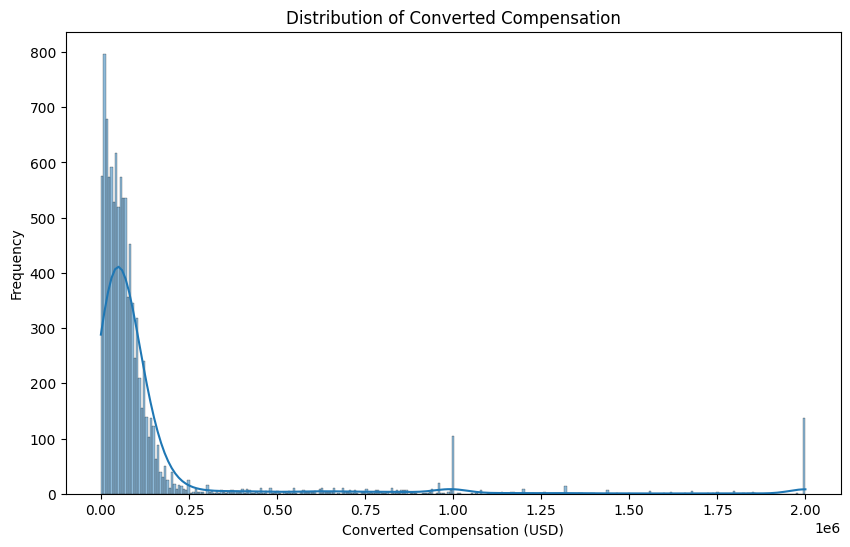

In [4]:
# your code goes here
# Remove duplicate rows
df_unique = df.drop_duplicates()

# Plot the distribution of 'ConvertedComp'
plt.figure(figsize=(10, 6))
sns.histplot(df_unique['ConvertedComp'].dropna(), kde=True)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

Plot the histogram for the column `ConvertedComp`.


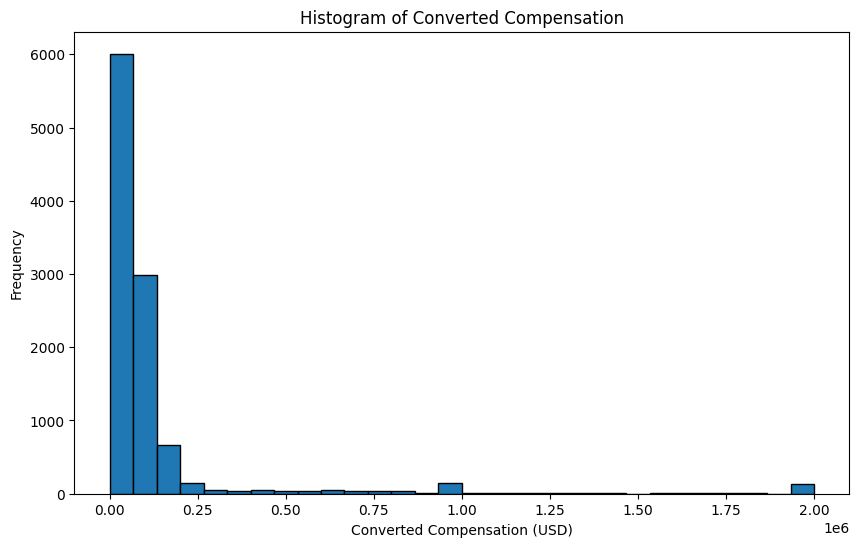

In [5]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df_unique['ConvertedComp'].dropna(), bins=30, edgecolor='k')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median_convertedcomp = df_unique['ConvertedComp'].median()

# Print the median
print("Median of ConvertedComp:", median_convertedcomp)

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
man_only_count = df_unique[df_unique['Gender'] == 'Man'].shape[0]

# Print the count
print("Number of respondents who identified only as 'Man':", man_only_count)

Number of respondents who identified only as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
woman_only_df = df_unique[df_unique['Gender'] == 'Woman']

# Calculate the median of 'ConvertedComp' for responders identified as 'Woman' only
median_convertedcomp_woman = woman_only_df['ConvertedComp'].median()

# Print the median ConvertedComp for responders identified as 'Woman' only
print("Median ConvertedComp for responders identified as 'Woman' only:", median_convertedcomp_woman)

Median ConvertedComp for responders identified as 'Woman' only: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
age_summary = df_unique['Age'].describe()

# Extract specific quartiles and median
minimum = age_summary['min']
q1 = age_summary['25%']
median = age_summary['50%']  # This is also the median
q3 = age_summary['75%']
maximum = age_summary['max']

# Display the five-number summary for Age
print("Five-Number Summary for Age:")
print(f"Minimum: {minimum}")
print(f"Q1 (25th percentile): {q1}")
print(f"Median (50th percentile): {median}")
print(f"Q3 (75th percentile): {q3}")
print(f"Maximum: {maximum}")

Five-Number Summary for Age:
Minimum: 16.0
Q1 (25th percentile): 25.0
Median (50th percentile): 29.0
Q3 (75th percentile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


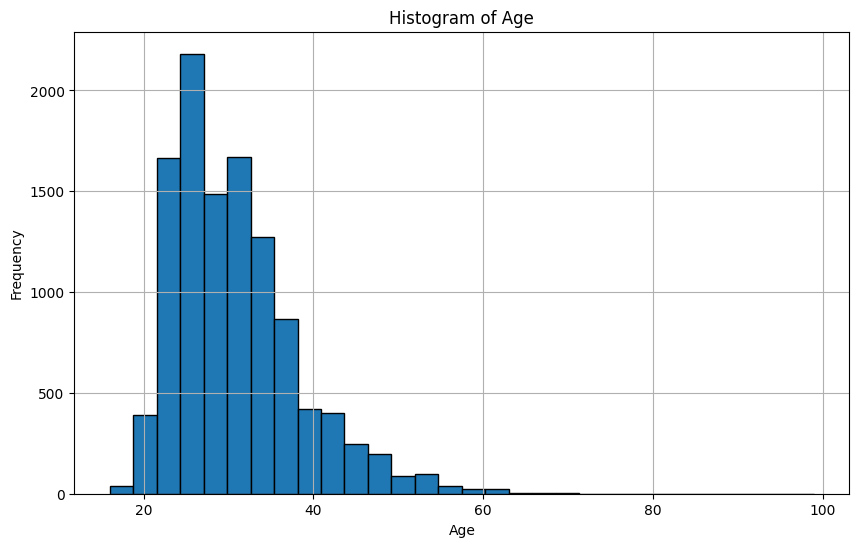

In [10]:
# your code goes here
# Plot the histogram of 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df_unique['Age'].dropna(), bins=30, edgecolor='k')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


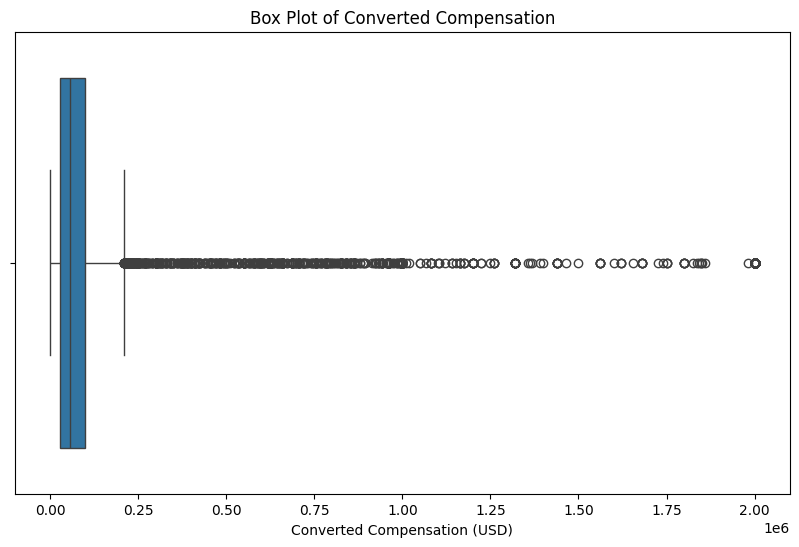

In [12]:
# your code goes here
# your code goes here
# Create a box plot for 'ConvertedComp'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_unique['ConvertedComp'])
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
Q1 = df_unique['ConvertedComp'].quantile(0.25)
Q3 = df_unique['ConvertedComp'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Print the IQR
print("Interquartile Range (IQR) for ConvertedComp:", IQR)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [14]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the lower and upper bounds
print("Lower Bound for outliers:", lower_bound)
print("Upper Bound for outliers:", upper_bound)

Lower Bound for outliers: -82830.0
Upper Bound for outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [15]:
# your code goes here
outliers = df_unique[(df_unique['ConvertedComp'] < lower_bound) | (df_unique['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print("Number of outliers in ConvertedComp:", num_outliers)

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [16]:
# your code goes here

mean_ConvertedComp = df_unique['ConvertedComp'].mean()
std_ConvertedComp = df_unique['ConvertedComp'].std()


df_unique['z_score'] = (df_unique['ConvertedComp'] - mean_ConvertedComp) / std_ConvertedComp


threshold = 3


df_no_outliers = df_unique[(df_unique['z_score'].abs() <= threshold)]

print("Shape of DataFrame without outliers:", df_no_outliers.shape)


print(df_no_outliers.head())

Shape of DataFrame without outliers: (10342, 86)
   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          16  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER qual

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [20]:
# your code goes here
import numpy as np
numeric_columns = df_unique.select_dtypes(include=[np.number]).columns

# Calculate correlation between 'Age' and all other numerical columns
correlation = df_unique[numeric_columns].corr()['Age']

# Print correlation results
print("Correlation between Age and all other numerical columns:")
print(correlation)

Correlation between Age and all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
z_score          0.105386
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
